In [44]:
import pandas as pd

from data_processing import correct_nasal_vowel_transcripts
from stats import SuffixAverage
from visualization import view_curve

## Suffix vs Non-suffix Words

In [47]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique['sg'] = nlexique['sg'].apply(correct_nasal_vowel_transcripts)
nlexique

,lexeme,variants,gen,sg,pl
0,à-côté,à-côté:accoté,m,akOte,akOte
1,à-coup,à-coup,m,aku,aku
2,à-peu-près,à-peu-près,m,apØpʁɛ,apØpʁɛ
3,à-pic,à-pic,m,apik,apik
4,à-plat,à-plat:aplat,m,apla,apla
...,...,...,...,...,...
31000,zurichois,zurichois,m,zyʁikwa,zyʁikwa
31001,zydeco,zydeco,f,zidəko,zidəko
31002,zygoma,zygoma,m,zigOma,zigOma
31003,zygote,zygote,m,zigɔt,zigɔt


In [48]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')

echantinom = (echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])] # rows
                       [['lemma', 'phon', 'gen', 'suffix', 'suffix_broad']]    # columns
                       .fillna(0)
                       .reset_index(drop=True)
                       )

echantinom = (pd.merge(echantinom, nlexique, left_on='lemma', right_on='lexeme', how='left', suffixes=('', '_y'))
               .drop(columns=['lexeme', 'phon', 'gen_y'])
               .dropna()
               .reset_index(drop=True)
               )
echantinom

,lemma,gen,suffix,suffix_broad,variants,sg,pl
0,berlingue,m,0,0,berlingue,bɛʁl3g,bɛʁlɛ̃g
1,corton,m,on,on,corton,kɔʁt2,kɔʁtɔ̃
2,dabuche,f,uche,Vche,dabuche,dabyʃ,dabyʃ
3,faf,m,0,0,faf,faf,faf
4,gail,f,0,0,gail,gaj,gaj
...,...,...,...,...,...,...,...
4527,palu,m,0,0,palu:palus,paly,paly
4528,talc,m,0,0,talc,talk,talk
4529,sauvetage,m,age,age,sauvetage,sOvətaʒ,sOvətaʒ
4530,plaid,m,0,0,plaid,plɛd,plɛd


### Orthographic forms

In [51]:
orth_preds = pd.read_csv('../results/echantinom_orth_preds_new.csv')
# orth_preds = orth_preds.join(echantinom.set_index('lemma')[['suffix']], on='Form').drop_duplicates().reset_index(drop=True)
# orth_preds.to_csv('../results/echantinom_orth_preds_new.csv', index=None)
orth_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
0,bi,bi,m,m,"[('i', {'m': 0.7116397619247437, 'f': 0.288360...",test,0
1,té,te,m,m,"[('é', {'m': 0.800595223903656, 'f': 0.1994047...",test,0
2,as,as,m,m,"[('s', {'m': 0.8321186304092407, 'f': 0.167881...",test,0
3,an,1,m,m,"[('n', {'m': 0.6683699488639832, 'f': 0.331630...",test,0
4,bec,bɛk,m,m,"[('c', {'m': 0.6196736693382263, 'f': 0.380326...",test,0
...,...,...,...,...,...,...,...
4526,approvisionnement,apʁOvizjɔnəm1,m,m,"[('t', {'m': 0.7665592432022095, 'f': 0.233440...",test,ment
4527,sous-alimentation,suzalim1tasj2,f,f,"[('n', {'m': 0.6683699488639832, 'f': 0.331630...",test,ion
4528,cul-de-basse-fosse,kydəbasəfos,m,m,"[('e', {'m': 0.8965256810188293, 'f': 0.103474...",test,0
4529,transsubstantiation,tʁ1ssypst1tjasj2,f,f,"[('n', {'m': 0.6683699488639832, 'f': 0.331630...",test,ion


In [52]:
orth_correct = orth_preds[orth_preds['Predicted Gender'] == orth_preds['True Gender']]

orth_percentage_correct = (orth_correct.shape[0] / orth_preds.shape[0]) * 100
orth_percentage_correct


90.09048775104833

In [53]:
incorrect = orth_preds[orth_preds['Predicted Gender'] != orth_preds['True Gender']]
incorrect.sample(5)

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
812,pence,pɛns,f,m,"[('e', {'m': 0.8965256810188293, 'f': 0.103474...",test,0
659,rifle,ʁifl,f,m,"[('e', {'m': 0.8965256810188293, 'f': 0.103474...",test,0
1919,fourgue,fuʁg,f,m,"[('e', {'m': 0.8965256810188293, 'f': 0.103474...",test,0
1019,couple,kupl,f,m,"[('e', {'m': 0.8965256810188293, 'f': 0.103474...",test,0
3184,araucaria,aʁOkaʁja,f,m,"[('a', {'m': 0.7095991373062134, 'f': 0.290400...",test,0


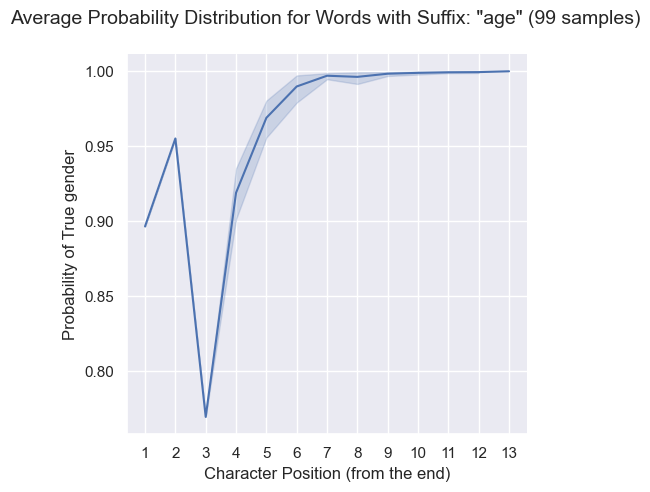

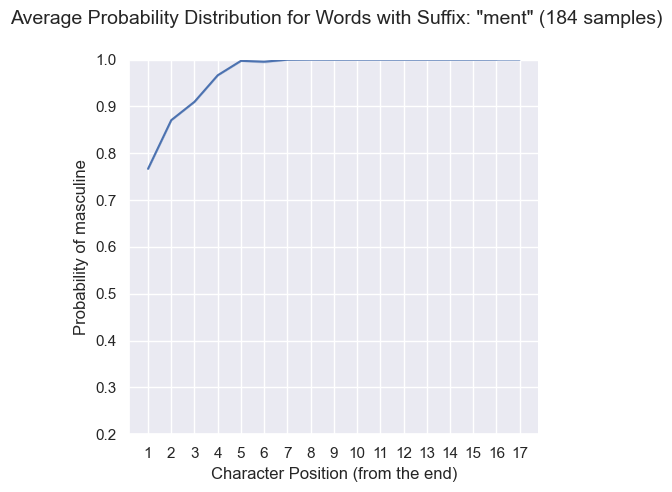

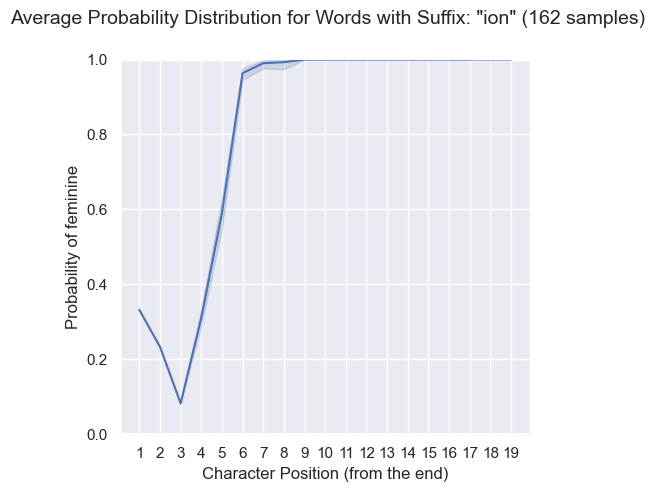

In [54]:
"""Uncomment to view the curves of individual example words"""
"""
Possible values for scale: 
- True (scales from 0 to 1), 
- False (default behavior), 
- List[int|float, int|float]: custom scaling range
"""

# view_curve(['passage'], orth_preds, binary=True, gender='f', display_probs=True, scale=False)
# print('-' * 100 + '\n')
# view_curve(['lignage'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['bâtiment'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['virement'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['formation'], orth_preds, binary=True, gender='f')
# print('-' * 100 + '\n')
# view_curve(['gradation'], orth_preds, binary=True, gender='f')

age_avg = SuffixAverage(orth_preds, 'age')
age_avg.plot(gender='True', scale=False)

ment_avg = SuffixAverage(orth_preds, 'ment')
ment_avg.plot(gender='m', scale=[0.2, 1])

ion_avg = SuffixAverage(orth_preds, 'ion')
ion_avg.plot(gender='f', scale=True)

In [58]:
orth_preds_x10 = pd.read_csv('../results/echantinom_orth_preds_x10_new.csv')
# orth_preds_x10 = orth_preds_x10.join(echantinom.set_index('lemma')[['suffix']], on='Form').drop_duplicates().reset_index(drop=True)
# orth_preds_x10.to_csv('../results/echantinom_orth_preds_x10_new.csv', index=None)

In [60]:
"""Uncomment to view the curves of an example word at each run"""

# view_curve(['gradation'], orth_preds_x10, binary=True, gender='True', multiruns=True, display_probs=True, scale=[0, 1.1])

'Uncomment to view the curves of an example word at each run'

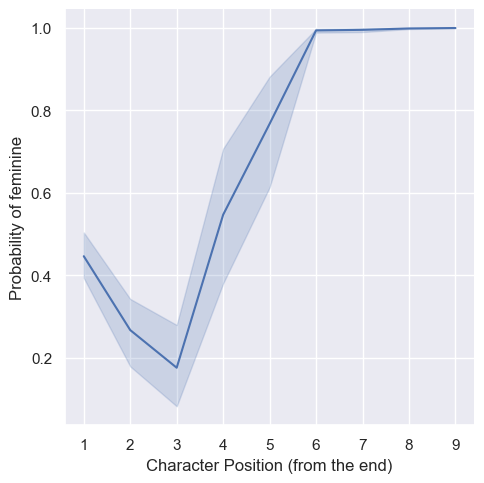

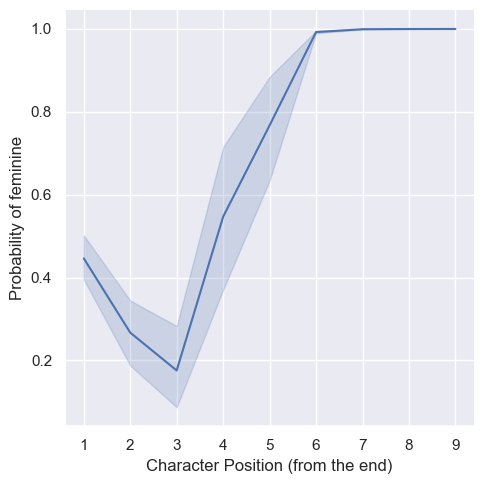

In [61]:
"""Average curve of an example word over multiple runs"""

sfx_avg = SuffixAverage(orth_preds_x10.query("Form == 'gradation'"), 'ion')
sfx_avg.plot(gender='f', title=False)

sfx_avg = SuffixAverage(orth_preds_x10.query("Form == 'sensation'"), 'ion')
sfx_avg.plot(gender='f', title=False)

### Phonetic forms

In [64]:
phon_preds = pd.read_csv('../results/echantinom_phon_preds_new.csv')
# phon_preds = (phon_preds.join(echantinom.set_index('sg')[['suffix']], on='Form')
#               .drop_duplicates('Alt Form')
#               .reset_index(drop=True)
#               )
# phon_preds.to_csv('../results/echantinom_phon_preds_new.csv', index=None)
phon_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
0,u,houx,m,m,"[('u', {'m': 0.25777819752693176, 'f': 0.74222...",test,0
1,4,hun,m,m,"[('4', {'m': 0.7863364815711975, 'f': 0.213663...",test,0
2,ɛ,ais,m,f,"[('ɛ', {'m': 0.6261009573936462, 'f': 0.373899...",test,0
3,ɛ,haie,m,f,"[('ɛ', {'m': 0.6261009573936462, 'f': 0.373899...",test,0
4,1,an,m,m,"[('1', {'m': 0.6604219675064087, 'f': 0.339578...",test,0
...,...,...,...,...,...,...,...
4526,kOsmOpOlitizm,cosmopolitisme,m,m,"[('m', {'m': 0.4336910843849182, 'f': 0.566308...",test,isme
4527,3k2patibilite,incompatibilité,f,f,"[('e', {'m': 0.3608175218105316, 'f': 0.639182...",test,ité
4528,ʁəstʁyktyʁasj2,restructuration,f,f,"[('2', {'m': 0.5888990759849548, 'f': 0.411100...",test,ion
4529,tʁadisjOnalizm,traditionalisme,m,m,"[('m', {'m': 0.4336910843849182, 'f': 0.566308...",test,isme


In [65]:
phon_correct = phon_preds[phon_preds['Predicted Gender'] == phon_preds['True Gender']]

phon_percentage_correct = (phon_correct.shape[0] / phon_preds.shape[0]) * 100
phon_percentage_correct


81.94659015669829

In [66]:
phon_incorrect = phon_preds[phon_preds['Predicted Gender'] != phon_preds['True Gender']]
phon_incorrect.sample(5)

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
1998,ʁEdœʁ,raider,f,m,"[('ʁ', {'m': 0.5094537734985352, 'f': 0.490546...",test,0
452,sap,sape,m,f,"[('p', {'m': 0.49326086044311523, 'f': 0.50673...",test,0
897,nunu,nounou,m,f,"[('u', {'m': 0.25777819752693176, 'f': 0.74222...",test,0
326,møl,meule,m,f,"[('l', {'m': 0.7289152145385742, 'f': 0.271084...",test,0
3149,tamaʁis,tamaris,f,m,"[('s', {'m': 0.5860527753829956, 'f': 0.413947...",test,0


In [67]:
phon_preds[phon_preds['Alt Form'].isin(['passage', 'lignage', 'bâtiment', 'virement', 'formation', 'gradation'])]

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,suffix
1933,liɲaʒ,lignage,m,m,"[('ʒ', {'m': 0.3291641175746918, 'f': 0.670835...",test,age
1936,pasaʒ,passage,m,m,"[('ʒ', {'m': 0.3291641175746918, 'f': 0.670835...",test,age
2487,viʁəm1,virement,m,m,"[('1', {'m': 0.6604219675064087, 'f': 0.339578...",test,ment
2850,batim1,bâtiment,m,m,"[('1', {'m': 0.6604219675064087, 'f': 0.339578...",test,ment
3668,fɔʁmasj2,formation,f,f,"[('2', {'m': 0.5888990759849548, 'f': 0.411100...",test,ion
3688,gʁadasj2,gradation,f,f,"[('2', {'m': 0.5888990759849548, 'f': 0.411100...",test,ion


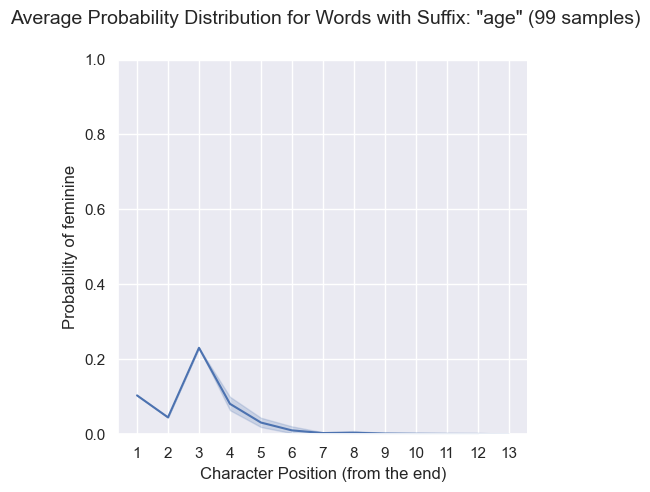

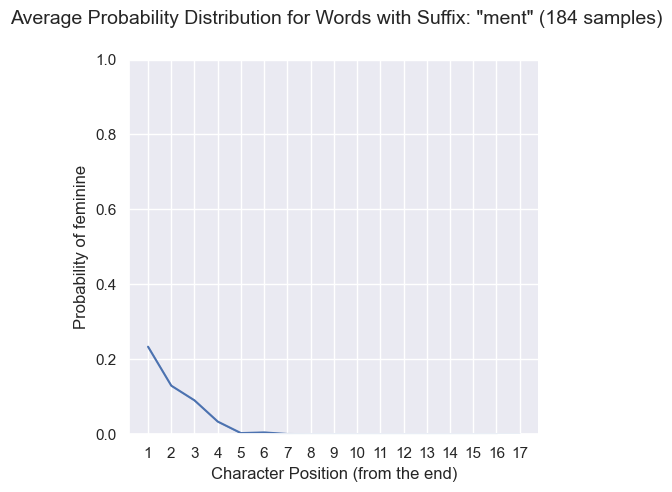

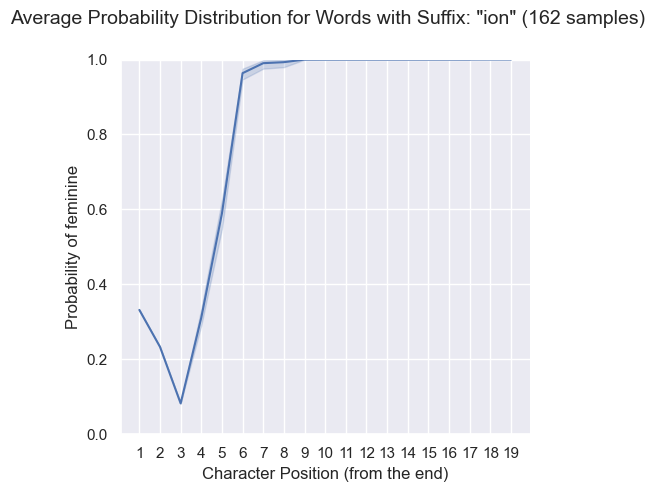

In [68]:
"""Uncomment to view the curves of individual example words"""

# view_curve(['pasaʒ'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['liɲaʒ'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['batim1'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['viʁəm1'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['fɔʁmasj2'], phon_preds, binary=True, gender='f', scale=True)
# print('-' * 100 + '\n')
# view_curve(['gʁadasj2'], phon_preds, binary=True, gender='f', scale=True)

age_avg = SuffixAverage(orth_preds, 'age')
age_avg.plot(gender='f', scale=True)

ment_avg = SuffixAverage(orth_preds, 'ment')
ment_avg.plot(gender='f', scale=True)

ion_avg = SuffixAverage(orth_preds, 'ion')
ion_avg.plot(gender='f', scale=True)

In [71]:
phon_preds_x10 = pd.read_csv('../results/echantinom_phon_preds_x10_new.csv')
# phon_preds_x10 = (phon_preds_x10.join(echantinom.set_index('sg')[['suffix']], on='Form')
#                   .drop_duplicates()
#                   .reset_index(drop=True)
#                   )
# phon_preds_x10.to_csv('../results/echantinom_phon_preds_x10_new.csv', index=None)
phon_preds_x10

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run,suffix
0,ɛ,m,f,"[('ɛ', {'m': 0.6685084104537964, 'f': 0.331491...",test,1,0
1,1,m,m,"[('1', {'m': 0.8267455697059631, 'f': 0.173254...",test,1,0
2,4,m,m,"[('4', {'m': 0.7416870594024658, 'f': 0.258312...",test,1,0
3,u,m,m,"[('u', {'m': 0.3996814787387848, 'f': 0.600318...",test,1,0
4,o,m,f,"[('o', {'m': 0.6201976537704468, 'f': 0.379802...",test,1,0
...,...,...,...,...,...,...,...
45365,3k2patibilite,f,f,"[('e', {'m': 0.6420694589614868, 'f': 0.357930...",test,10,ité
45366,k2fid1sjalite,f,f,"[('e', {'m': 0.6420694589614868, 'f': 0.357930...",test,10,ité
45367,ʁəstʁyktyʁasj2,f,f,"[('2', {'m': 0.5244074463844299, 'f': 0.475592...",test,10,ion
45368,tʁadisjOnalizm,m,m,"[('m', {'m': 0.33775582909584045, 'f': 0.66224...",test,10,isme


In [73]:
"""Uncomment to view the curves of an example word at each run"""

# view_curve(['gʁadasj2'], phon_preds_x10, binary=True, gender='f', multiruns=True)

'Uncomment to view the curves of an example word at each run'

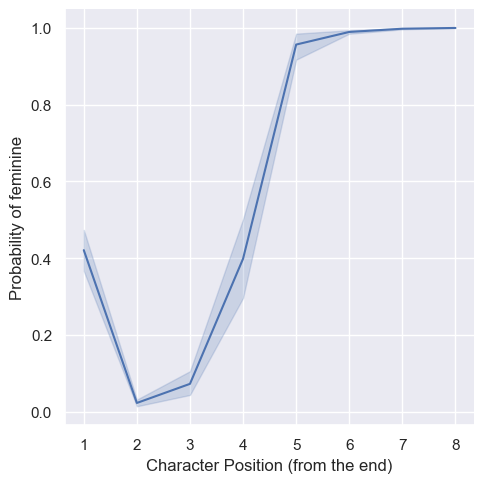

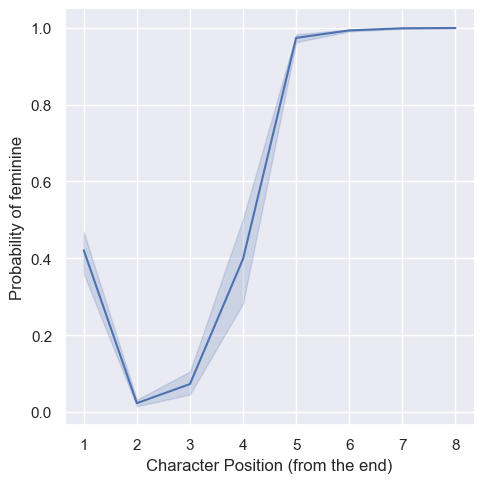

In [74]:
"""Average curve of an example word over multiple runs"""

sfx_avg = SuffixAverage(phon_preds_x10.query("Form == 'gʁadasj2'"), 'ion')
sfx_avg.plot(gender='f', title=False)

sfx_avg = SuffixAverage(phon_preds_x10.query("Form == 'fɔʁmasj2'"), 'ion')
sfx_avg.plot(gender='f', title=False)

In [19]:
# [word for word in orth_preds_x10['Form'].tolist() if word.endswith('tion')]

### Comparing plots of multiple words

Run 1 of 10:


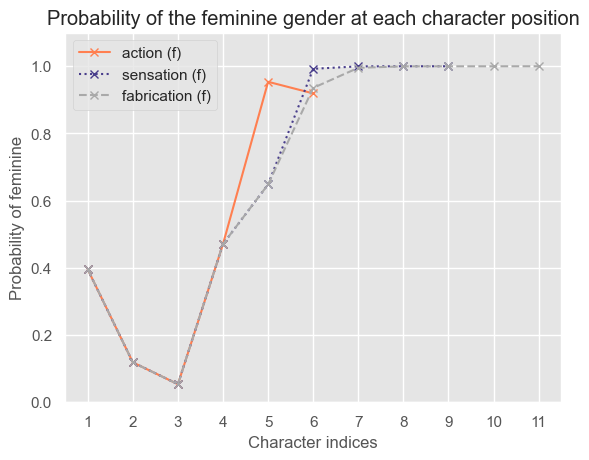

Run 2 of 10:


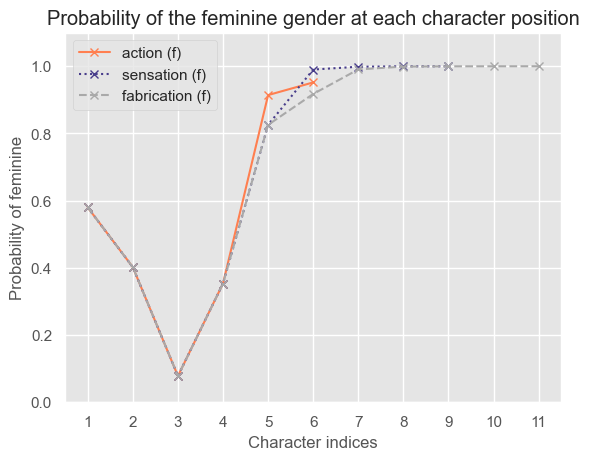

Run 3 of 10:


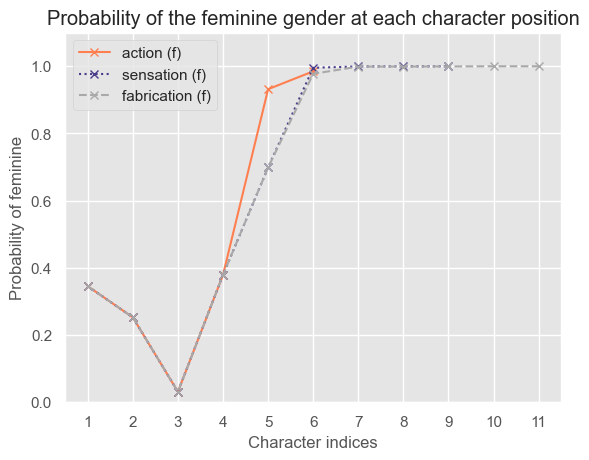

Run 4 of 10:


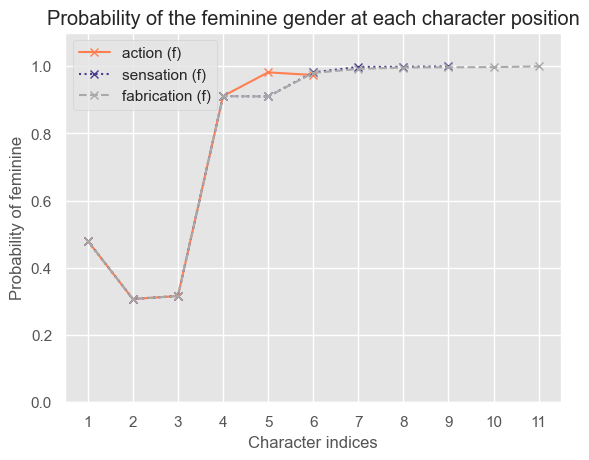

Run 5 of 10:


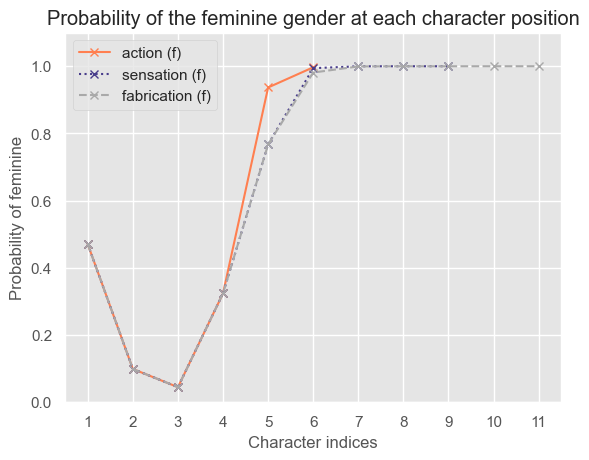

Run 6 of 10:


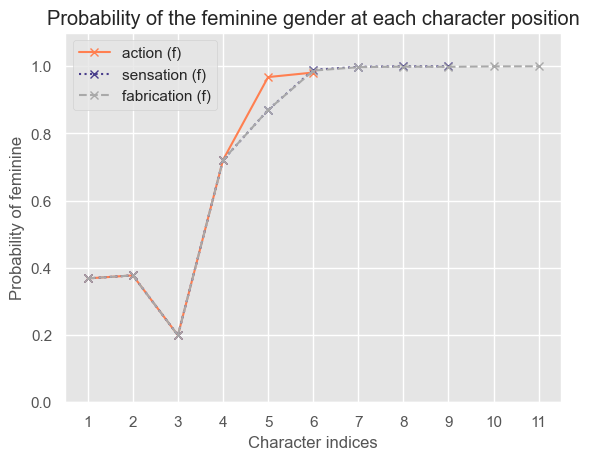

Run 7 of 10:


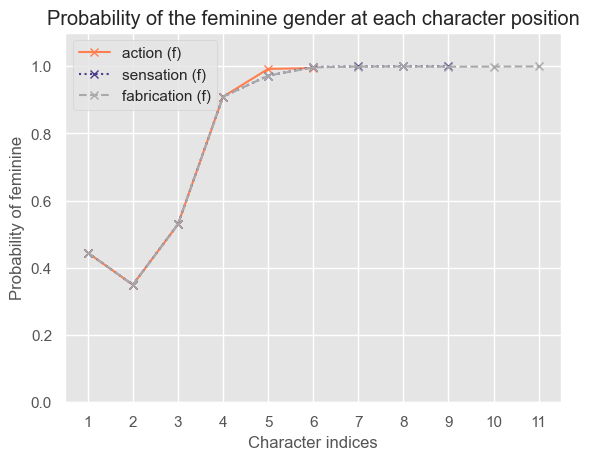

Run 8 of 10:


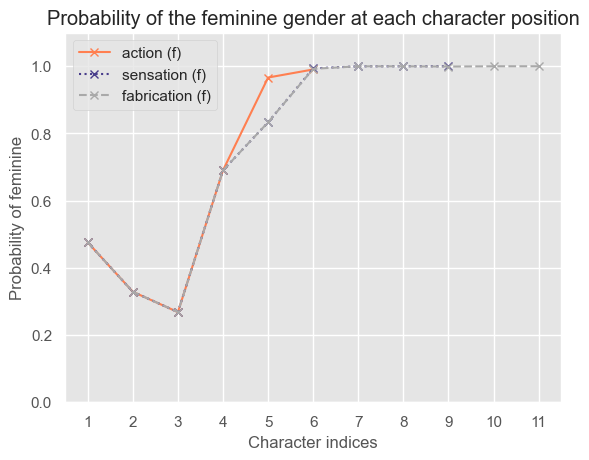

Run 9 of 10:


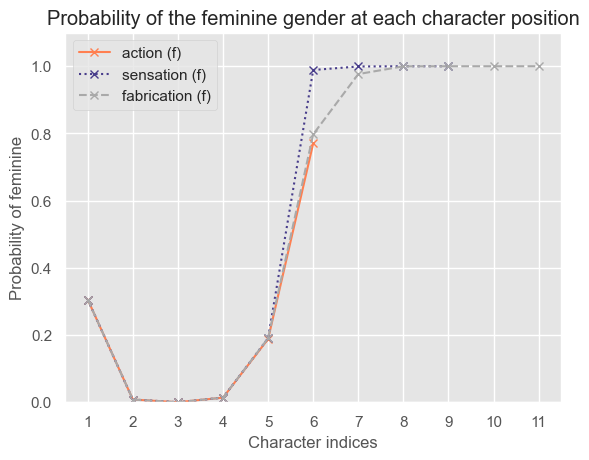

Run 10 of 10:


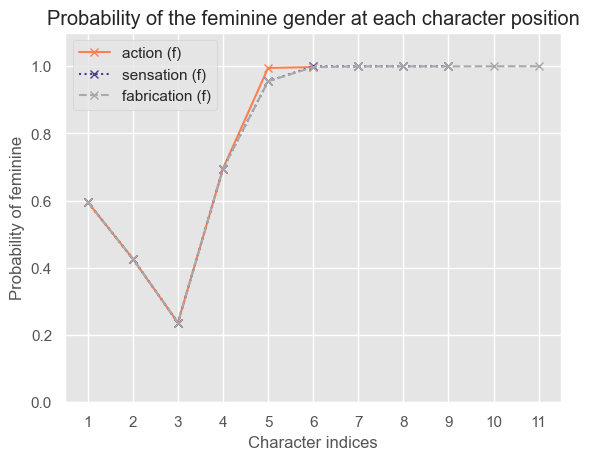

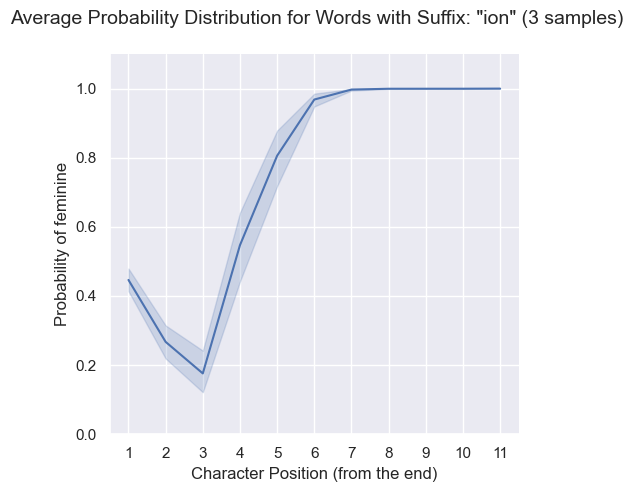

In [75]:
# view_curve(['emballage', 'repassage', 'nettoyage'], orth_preds_x10, binary=True, gender='m', multiruns=True, scale=[0, 1.1])
# suffix_avg_plot(orth_preds_x10.query("Form in ['emballage', 'repassage', 'nettoyage']"), 'age', gender='m', scale=[0, 1.1])

view_curve(['action', 'sensation', 'fabrication'], orth_preds_x10, binary=True, gender='f', multiruns=True, scale=[0, 1.1])
sfx_avg = SuffixAverage(orth_preds_x10.query("Form in ['action', 'sensation', 'fabrication']"), 'ion')
sfx_avg.plot(gender='f', scale=[0, 1.1])